# EDA API

### Importación de librerías

In [76]:
import sys
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
sys.path.append(os.path.abspath('../source'))


### Descarga de Datos de Accidentes FARS desde la API de NHTSA

Primero, carga un par de herramientas: requests para conectarse a la API y os para manejar carpetas. Luego, define la dirección web base de la API y unos encabezados que hacen que parezca que la petición viene de un navegador. Crea una carpeta llamada ../data para guardar los archivos, y si ya existe, no hay problema.

Después, usa un bucle para recorrer los años de 2017 a 2022. Para cada año, arma una dirección web con los detalles necesarios (como el año y que queremos CSV) y hace la petición a la API. Si todo sale bien (código 200), guarda los datos en un archivo con nombre como FARS_data_año.csv. Si algo falla, muestra un mensaje con el problema, ya sea porque tardó mucho o por otro error.

In [77]:
base_url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/FARSData/GetFARSData"

# Encabezados
headers = {
    "Accept": "application/json", #TODO: cambiar a "Accept": "text/csv"
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# Crear la carpeta para almacenar los archivos CSV
output_dir = "../data"
os.makedirs(output_dir, exist_ok=True)

# Automatizar la descarga por año
for year in range(2017, 2023):  # De 2015 a 2022
    # Construir la URL para cada año dinámicamente
    url = f"{base_url}?dataset=Accident&FromYear={year}&ToYear={year}&State=*&format=csv"
    print(f"Descargando datos para el año {year}...")

    try:
        # Realizar la solicitud al API
        response = requests.get(url, headers=headers, timeout=600, stream=True)  # Timeout de 10 minutos

        # Verificar si la solicitud fue exitosa
        if response.status_code == 200:
            # Guardar los datos en el archivo CSV
            output_file = os.path.join(output_dir, f"FARS_data_{year}.csv")
            with open(output_file, "wb") as file:
                for chunk in response.iter_content(chunk_size=1024):
                    if chunk:
                        file.write(chunk)
            print(f"✅ Datos del año {year} guardados exitosamente en {output_file}")
        else:
            print(f"❌ Error al obtener los datos para el año {year}: Código HTTP {response.status_code}")
            print(response.text)

    except requests.exceptions.Timeout:
        print(f"⏱️ La solicitud para el año {year} excedió el tiempo límite.")
    except requests.exceptions.RequestException as e:
        print(f"❌ Error en la solicitud para el año {year}: {e}")

Descargando datos para el año 2017...
✅ Datos del año 2017 guardados exitosamente en ../data/FARS_data_2017.csv
Descargando datos para el año 2018...
✅ Datos del año 2018 guardados exitosamente en ../data/FARS_data_2018.csv
Descargando datos para el año 2019...
✅ Datos del año 2019 guardados exitosamente en ../data/FARS_data_2019.csv
Descargando datos para el año 2020...
✅ Datos del año 2020 guardados exitosamente en ../data/FARS_data_2020.csv
Descargando datos para el año 2021...
✅ Datos del año 2021 guardados exitosamente en ../data/FARS_data_2021.csv
Descargando datos para el año 2022...
✅ Datos del año 2022 guardados exitosamente en ../data/FARS_data_2022.csv


#### Carga de Datos de Accidentes FARS desde Archivos CSV

para leer cada archivo CSV que está en la carpeta ../data. Cada archivo se guarda en una variable distinta: data_2017, data_2018, y así hasta data_2022. Estas variables quedan listas como tablas en la memoria para que las podamos analizar o usar después.

In [78]:
data_2017 = pd.read_csv('../data/FARS_data_2017.csv')
data_2018 = pd.read_csv('../data/FARS_data_2018.csv')
data_2019 = pd.read_csv('../data/FARS_data_2019.csv')
data_2020 = pd.read_csv('../data/FARS_data_2020.csv')
data_2021 = pd.read_csv('../data/FARS_data_2021.csv')
data_2022 = pd.read_csv('../data/FARS_data_2022.csv')

/tmp/ipykernel_67377/2599200083.py:1: DtypeWarning: Columns (41,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2017 = pd.read_csv('../data/FARS_data_2017.csv')


#### Unión de Datos de Accidentes FARS desde Archivos CSV

Después, con pd.concat() junta todas esas tablas en una sola, llamada df. El ignore_index=True hace que los números de las filas se reinicien y no se mezclen los índices viejos. Por último, df.head() muestra las primeras 5 filas de la tabla para que veamos cómo quedó.

Esto es para unir todos los datasets en uno solo. Así, en lugar de tener los datos de cada año por separado, los tenemos en una sola tabla grande, más fácil de analizar o usar para sacar información.

In [79]:
df = pd.concat([data_2017, data_2018, data_2019, data_2020, data_2021, data_2022], ignore_index=True)
df.head()

,caseyear,state,st_case,statename,ve_total,ve_forms,pvh_invl,peds,pernotmvit,permvit,...,hosp_mn,hosp_mnname,cf1,cf1name,cf2,cf2name,cf3,cf3name,fatals,drunk_dr
0,2017,1,10001,Alabama,1,1,0,0,0,1,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
1,2017,1,10002,Alabama,1,1,0,0,0,1,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
2,2017,1,10003,Alabama,3,3,0,0,0,3,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
3,2017,1,10004,Alabama,1,1,0,0,0,1,...,88,Not Applicable (Not Transported),20.0,Police Pursuit Involved,0.0,NaN,0.0,NaN,1,0.0
4,2017,1,10005,Alabama,1,1,0,0,0,2,...,11,11,0.0,NaN,0.0,NaN,0.0,NaN,1,0.0


### Generalidades

In [80]:
df.shape

(218777, 94)

Al ejecutar df.shape, se obtiene como resultado (218576, 93), lo que indica que el dataset contiene 218,576 registros (filas) y 93 variables (columnas). Esta cantidad significativa de datos proporciona la api es una base sólida para realizar un análisis exhaustivo sobre los accidentes de tránsito. La alta dimensionalidad también sugiere la presencia de múltiples factores que podrían influir en los siniestros viales. 

#### Tipos de Dtaos

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218777 entries, 0 to 218776
Data columns (total 94 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   caseyear      218777 non-null  int64  
 1   state         218777 non-null  int64  
 2   st_case       218777 non-null  int64  
 3   statename     218777 non-null  object 
 4   ve_total      218777 non-null  int64  
 5   ve_forms      218777 non-null  int64  
 6   pvh_invl      218777 non-null  int64  
 7   peds          218777 non-null  int64  
 8   pernotmvit    218777 non-null  int64  
 9   permvit       218777 non-null  int64  
 10  persons       218777 non-null  int64  
 11  county        218777 non-null  int64  
 12  countyname    218777 non-null  object 
 13  city          218777 non-null  int64  
 14  cityname      218777 non-null  object 
 15  day           218777 non-null  int64  
 16  dayname       218777 non-null  int64  
 17  month         218777 non-null  int64  
 18  mont

Al ejecutar df.info(), se observa que el conjunto de datos está compuesto por 218,777 registros distribuidos en 94 columnas. Las variables presentan tres tipos de datos principales: int64 (43 columnas), float64 (10 columnas) y object (41 columnas), lo que indica una mezcla entre datos numéricos y categóricos.

Un aspecto relevante a destacar es la presencia de valores nulos en algunas variables. Por ejemplo, la columna drunk_dr, relacionada posiblemente con conducción bajo efectos del alcohol, contiene 138,981 valores no nulos, lo que implica una proporción considerable de datos faltantes que deberá abordarse en etapas posteriores de limpieza o imputación.

In [82]:
df.columns

Index(['caseyear', 'state', 'st_case', 'statename', 've_total', 've_forms',
       'pvh_invl', 'peds', 'pernotmvit', 'permvit', 'persons', 'county',
       'countyname', 'city', 'cityname', 'day', 'dayname', 'month',
       'monthname', 'year', 'day_week', 'day_weekname', 'hour', 'hourname',
       'minute', 'minutename', 'nhs', 'nhsname', 'rur_urb', 'rur_urbname',
       'func_sys', 'func_sysname', 'rd_owner', 'rd_ownername', 'route',
       'routename', 'tway_id', 'tway_id2', 'milept', 'mileptname', 'latitude',
       'latitudename', 'longitud', 'longitudname', 'sp_jur', 'sp_jurname',
       'harm_ev', 'harm_evname', 'man_coll', 'man_collname', 'reljct1',
       'reljct1name', 'reljct2', 'reljct2name', 'typ_int', 'typ_intname',
       'wrk_zone', 'wrk_zonename', 'road_fnc', 'road_fncname', 'rel_road',
       'rel_roadname', 'lgt_cond', 'lgt_condname', 'weather1', 'weather1name',
       'weather2', 'weather2name', 'weather', 'weathername', 'sch_bus',
       'sch_busname', 'rail', 'rai

Este listado permite identificar cada una de las variables disponibles, lo cual resulta fundamental para planificar las siguientes etapas del análisis, como la limpieza, transformación y exploración detallada de los datos.

### Limpieza

### PERSONS

Data Element ID Data Element Name SAS Name 
P5/NM5 Age  AGE 
P6/NM6 Sex  SEX 
P7/NM7 Person Type  PER_TYP 
P8/NM8 Injury Severity  INJ_SEV 
P9 Seating Position  SEAT_POS 
P10A Restraint System Use  REST_USE
P13 Ejection  EJECTION
P17C/NM19C Alcohol Test Result  ALC_RES
P19A/NM21A Drug Test Status  DSTATUS
P21/NM23 Died at Scene/En Route  DOA 


### VEHICLES

V4 Number of Occupants  NUMOCCS
V6 Hit-and-Run  HIT_RUN 
V16 NCSA Body Type  BODY_TYP
D5 Driver’s License State  L_STATE 
D7A Non-CDL License Type  L_TYPE 
D11 Compliance with License Restrictions  L_RESTRI
D14 Previous Recorded Crashes  PREV_ACC 
D17 Previous Speeding Convictions  PREV_SPD 
D18 Previous Other Moving Violation Convictions  PREV_OTH 
D15C Previous Recorded Other Suspensions, 
Revocations, or Withdrawals  
PREV_SUS3 

In [83]:
columns = [
    've_total', 'pernotmvit', 'permvit', 'fatals', 'peds',
    'hosp_hr', 'hosp_mn', 'arr_hour', 'arr_min',
    'year', 'monthname', 'day_weekname', 'hourname',
    'state', 'statename', 'rur_urbname', 'func_sysname', 'rel_roadname',
    'weathername', 'lgt_condname',
    'drunk_dr',
    'man_collname', 'harm_evname'
]

df = df[columns]


Luego de un análisis exploratorio preliminar de todas las variables disponibles, se seleccionó un subconjunto de 23 columnas consideradas más representativas para entender con mayor profundidad las causas y características de los accidentes de tránsito. Estas variables fueron almacenadas en la lista columns, y posteriormente se filtró el DataFrame original (df = df[columns]) para conservar únicamente esta selección.

Las columnas elegidas abarcan aspectos clave como:

Información del accidente: número total de vehículos involucrados (ve_total), número de peatones (peds), heridos (pernotmvit, permvit), y número de víctimas fatales (fatals).

Tiempo de respuesta y ocurrencia: hora de hospitalización (hosp_hr, hosp_mn), hora y minuto de llegada de los servicios de emergencia (arr_hour, arr_min), año, nombre del mes, día de la semana y hora del incidente.

Ubicación y contexto geográfico: estado (state, statename), zona urbana o rural (rur_urbname), y funcionalidad del sistema vial (func_sysname).

Condiciones externas: condiciones climáticas (weathername), iluminación (lgt_condname) y relación del accidente con el estado de la vía (rel_roadname).

Factores de riesgo: presencia de conducción bajo efectos del alcohol (drunk_dr), tipo de colisión (man_collname) y evento perjudicial principal (harm_evname).

Esta selección de variables permite reducir la dimensionalidad sin perder información crítica, y a la vez amplía el contexto analítico del dataset original, facilitando una mejor interpretación de los factores que intervienen en un accidente de tránsito.

In [84]:
df

,ve_total,pernotmvit,permvit,fatals,peds,hosp_hr,hosp_mn,arr_hour,arr_min,year,...,state,statename,rur_urbname,func_sysname,rel_roadname,weathername,lgt_condname,drunk_dr,man_collname,harm_evname
0,1,0,1,1,0,88,88,99,99,2017,...,1,Alabama,Urban,Interstate,On Median,Clear,Dark - Not Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Fence
1,1,0,1,1,0,88,88,15,9,2017,...,1,Alabama,Urban,Interstate,On Median,Clear,Daylight,0.0,Not a Collision with Motor Vehicle In-Transport,Rollover/Overturn
2,3,0,3,1,0,88,88,99,99,2017,...,1,Alabama,Urban,Interstate,On Roadway,Clear,Dark - Not Lighted,0.0,Front-to-Rear,Motor Vehicle In-Transport
3,1,0,1,1,0,88,88,16,58,2017,...,1,Alabama,Urban,Minor Arterial,On Roadside,Rain,Dark - Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Utility Pole/Light Support
4,1,0,2,1,0,21,11,20,31,2017,...,1,Alabama,Rural,Interstate,On Median,Rain,Dark - Not Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Embankment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218772,2,0,2,1,0,12,4,11,35,2022,...,56,Wyoming,Urban,Interstate,On Roadway,Clear,Daylight,NaN,Front-to-Front,Motor Vehicle In-Transport
218773,1,0,1,1,0,88,88,99,98,2022,...,56,Wyoming,Rural,Not Reported,On Roadway,Snow,Dawn,NaN,The First Harmful Event was Not a Collision wi...,Rollover/Overturn
218774,1,0,1,1,0,15,27,15,7,2022,...,56,Wyoming,Urban,Major Collector,On Roadside,Snow,Daylight,NaN,The First Harmful Event was Not a Collision wi...,Curb
218775,1,0,1,1,0,88,88,7,40,2022,...,56,Wyoming,Rural,Not Reported,On Roadside,Snow,Dark - Not Lighted,NaN,The First Harmful Event was Not a Collision wi...,Boulder


In [85]:
df.dtypes

ve_total          int64
pernotmvit        int64
permvit           int64
fatals            int64
peds              int64
hosp_hr           int64
hosp_mn           int64
arr_hour          int64
arr_min           int64
year              int64
monthname        object
day_weekname     object
hourname         object
state             int64
statename        object
rur_urbname      object
func_sysname     object
rel_roadname     object
weathername      object
lgt_condname     object
drunk_dr        float64
man_collname     object
harm_evname      object
dtype: object

Se observa una estructura diversa que refleja la naturaleza heterogénea del dataset. En total, se identifican tres tipos de datos principales:

int64: presente en la mayoría de las variables numéricas (por ejemplo, ve_total, fatals, arr_hour, year), representa valores enteros y cuantificables relacionados con el número de vehículos, víctimas, tiempos y códigos.

float64: utilizado únicamente en la columna drunk_dr, lo cual sugiere que esta variable puede contener valores decimales o valores nulos (NaN), típicos de datos que requieren imputación o limpieza adicional.

object: abarca las variables categóricas como monthname, day_weekname, statename, weathername, entre otras

#### Manejo de datos de faltantes

In [86]:
df.isnull().sum()

ve_total            0
pernotmvit          0
permvit             0
fatals              0
peds                0
hosp_hr             0
hosp_mn             0
arr_hour            0
arr_min             0
year                0
monthname           0
day_weekname        0
hourname            0
state               0
statename           0
rur_urbname         0
func_sysname        0
rel_roadname        0
weathername         0
lgt_condname        0
drunk_dr        79796
man_collname        0
harm_evname         0
dtype: int64

Al aplicar el método df.isnull().sum(), se identificó la existencia de valores nulos únicamente en la columna drunk_dr, con un total de 79,796 registros faltantes. Esto representa una proporción considerable dentro del total de 218,777 observaciones, lo cual es relevante ya que dicha variable indica si hubo conductores ebrios involucrados en el accidente.

El resto de las columnas analizadas no presentan valores nulos, lo cual es positivo y facilita la continuidad del análisis sin necesidad de una limpieza extensa.

In [87]:
df = df.dropna()

Se decidió eliminar las filas con valores nulos utilizando el método df.dropna(). Esta decisión se tomó específicamente por la columna drunk_dr, la única que presentaba una cantidad significativa de datos faltantes. Dado que esta variable es clave para el análisis de accidentes relacionados con conductores bajo efectos del alcohol, su ausencia podría afectar directamente la validez de los resultados.

Además, debido al alto volumen de datos disponibles, eliminar las filas incompletas no representa una pérdida crítica de información. Por otro lado, imputar los valores faltantes no era una opción adecuada, ya que podría introducir sesgos y disminuir la fiabilidad del análisis. Por ello, para mantener la consistencia y calidad de los datos, se optó por excluir estas observaciones.

In [88]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

Se verifica nuevamente si existen datos nulos en el dataset usando el código nos da Como resultado, se confirma que no hay valores nulos en ninguna columna.

In [89]:
df.shape

(138981, 23)

Después de eliminar los datos nulos, el dataset quedó con 138981 filas y con 23 columnas, lo cual sigue siendo un número considerable para el análisis que se desea realizar. Esto asegura que, a pesar de la limpieza, se conserva una buena cantidad de información útil para extraer conclusiones significativas.

#### Manejo de datos duplicados

In [90]:
df.duplicated().sum()

91

In [91]:
df[df.duplicated()]

,ve_total,pernotmvit,permvit,fatals,peds,hosp_hr,hosp_mn,arr_hour,arr_min,year,...,state,statename,rur_urbname,func_sysname,rel_roadname,weathername,lgt_condname,drunk_dr,man_collname,harm_evname
4339,1,1,1,1,1,88,88,99,99,2017,...,6,California,Urban,Principal Arterial - Other,On Roadway,Clear,Dark - Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Pedestrian
4597,1,1,1,1,1,99,99,99,99,2017,...,6,California,Urban,Principal Arterial - Other,On Roadway,Clear,Dark - Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Pedestrian
4725,1,1,1,1,1,88,88,99,99,2017,...,6,California,Urban,Minor Arterial,On Roadway,Clear,Dark - Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Pedestrian
4760,1,1,1,1,1,99,99,99,99,2017,...,6,California,Urban,Principal Arterial - Other,On Roadway,Clear,Dark - Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Pedestrian
4984,1,1,1,1,1,99,99,99,99,2017,...,6,California,Urban,Principal Arterial - Other,On Roadway,Clear,Dark - Lighted,0.0,Not a Collision with Motor Vehicle In-Transport,Pedestrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126955,2,0,3,1,0,99,99,99,99,2020,...,37,North Carolina,Rural,Local,On Roadway,Clear,Daylight,0.0,Front-to-Front,Motor Vehicle In-Transport
133153,1,1,1,1,1,88,88,99,98,2020,...,48,Texas,Urban,Minor Arterial,On Roadway,Cloudy,Dark - Not Lighted,0.0,The First Harmful Event was Not a Collision wi...,Pedestrian
134417,2,0,2,1,0,88,88,99,98,2020,...,48,Texas,Urban,Major Collector,On Roadway,Clear,Dark - Not Lighted,0.0,Front-to-Front,Motor Vehicle In-Transport
134802,1,0,1,1,0,88,88,99,98,2020,...,48,Texas,Urban,Principal Arterial - Other,On Roadside,Clear,Dawn,0.0,The First Harmful Event was Not a Collision wi...,Immersion or Partial Immersion


Es importante identificar cuántos registros duplicados existen en el dataset para evitar distorsiones en los análisis posteriores. En este caso, se encontraron 91 datos duplicados, los cuales podrían influir negativamente en los resultados si no se eliminan adecuadamente. 

In [92]:
df = df.drop_duplicates()

Después de identificar los datos duplicados en el dataset, se procede a eliminarlos usando drop_duplicates() con el fin de mantener la integridad de los datos y asegurar que el análisis posterior no se vea afectado por información repetida.

In [93]:
df.shape

(138890, 23)

Después de eliminar los datos duplicados, nos quedamos con 138,890 filas y 23 columnas. Esto sigue representando una cantidad significativa de datos, lo cual es adecuado para realizar un análisis confiable y detallado.

In [94]:
df['hourname'].value_counts()    

hourname
6:00pm-6:59pm      8145
8:00pm-8:59pm      8123
9:00pm-9:59pm      8053
7:00pm-7:59pm      7860
5:00pm-5:59pm      7593
4:00pm-4:59pm      7056
3:00pm-3:59pm      7033
10:00pm-10:59pm    6954
2:00pm-2:59pm      6419
11:00pm-11:59pm    6292
1:00pm-1:59pm      5865
12:00pm-12:59pm    5448
0:00am-0:59am      5372
6:00am-6:59am      5213
1:00am-1:59am      4950
11:00am-11:59am    4881
2:00am-2:59am      4864
7:00am-7:59am      4581
5:00am-5:59am      4383
10:00am-10:59am    4230
8:00am-8:59am      3717
9:00am-9:59am      3714
3:00am-3:59am      3671
4:00am-4:59am      3438
Unknown Hours      1035
Name: count, dtype: int64

Al analizar la frecuencia de accidentes según la franja horaria (hourname), se observa que la mayoría de los siniestros ocurren entre 6:00pm y 6:59pm, con un total de 8145 registros.
Le siguen muy de cerca otras franjas del horario nocturno, como 8:00pm-8:59pm (8123 casos) y 9:00pm-9:59pm (8053 casos), lo que indica una alta concentración de accidentes durante el periodo de la tarde-noche, probablemente relacionado con el regreso a casa y el aumento del tráfico.
Además, se identificaron 1035 registros con hora desconocida, lo cual representa una porción menor del total, pero importante de tener en cuenta para futuras limpiezas o análisis de calidad de los datos.

In [95]:
df.drop(df[df['hourname'] == 'Unknown Hours'].index, inplace = True)

Se eliminan los registros cuya franja horaria corresponde a 'Unknown Hours', ya que no se dispone de información precisa sobre la hora del accidente. Esta decisión se toma con el fin de mantener la integridad de los datos y asegurar una mayor coherencia en los análisis posteriores relacionados con el comportamiento temporal de los accidentes.


In [96]:
df['rur_urbname'].value_counts()    

rur_urbname
Urban                                78065
Rural                                59366
Trafficway Not in State Inventory      270
Unknown                                134
Not Reported                            20
Name: count, dtype: int64

Al analizar la variable 'rur_urbname', se observa que la mayoría de los accidentes ocurren en zonas urbanas (78,065 casos), seguidas por zonas rurales (59,366 casos). También se identifican algunos registros con valores no específicos: 'Trafficway Not in State Inventory', 'Unknown' y 'Not Reported', lo cual indica que en ciertos casos no se tiene claridad sobre el tipo de zona donde ocurrió el accidente. Esto podría afectar ligeramente los análisis espaciales si no se depuran o tratan adecuadamente esos valores.

In [97]:
df.drop(df[df["rur_urbname"] == "Not Reported"].index, inplace=True)
df.drop(df[df["rur_urbname"] == "Trafficway Not in State Inventory"].index, inplace=True)
df.drop(df[df["rur_urbname"] == "Unknown"].index, inplace=True)

Como se identificó previamente, algunos registros en la columna 'rur_urbname' contenían valores como 'Not Reported', 'Trafficway Not in State Inventory' y 'Unknown', los cuales no aportan información específica ni útil para el análisis. Por esta razón, se decidió eliminar estas filas del dataset, con el objetivo de mantener la calidad, consistencia y relevancia de los datos para los análisis posteriores.

In [98]:
df['weathername'].value_counts()  

weathername
Clear                       94275
Cloudy                      19146
Rain                        10507
Not Reported                 9428
Fog, Smog, Smoke             1538
Snow                         1314
Reported as Unknown           352
Severe Crosswinds             216
Sleet or Hail                 189
Other                         119
Freezing Rain or Drizzle      113
Blowing Snow                  105
Unknown                        93
Blowing Sand, Soil, Dirt       36
Name: count, dtype: int64

Al analizar la variable 'weathername', se observa que la mayoría de los accidentes ocurrieron en condiciones climáticas despejadas ('Clear'), con un total de 94,275 registros. Esto sugiere que el clima no siempre es un factor determinante en la ocurrencia de accidentes, aunque otras condiciones como 'Rain', 'Cloudy' o 'Fog, Smog, Smoke' también presentan cantidades considerables.

Además, se identificaron categorías como 'Not Reported', 'Reported as Unknown' y 'Unknown', que no aportan información específica sobre el clima. Estos valores deben ser tenidos en cuenta para una limpieza del dataset, con el fin de garantizar mayor integridad y utilidad en los análisis posteriores.

In [99]:
df.drop(df[df["weathername"] == "Not Reported"].index, inplace=True)
df.drop(df[df["weathername"] == "Other"].index, inplace=True)
df.drop(df[df["weathername"] == "Unknown"].index, inplace=True)
df.drop(df[df["weathername"] == "Reported as Unknown"].index, inplace=True)

Como ya se había identificado en el análisis previo, existen valores en la variable 'weathername' que no aportan información específica o relevante, como 'Not Reported', 'Other', 'Unknown' y 'Reported as Unknown'. Por esta razón, se decidió eliminar estos registros del dataset. Esta limpieza permite mantener la coherencia y la integridad de los datos, lo cual es fundamental para obtener resultados más precisos y significativos en los análisis posteriores.

In [100]:
df.shape

(127439, 23)

Después de realizar el proceso de limpieza  que incluyó la eliminación de datos nulos, registros duplicados y valores categóricos no informativos el dataset final quedó con 127,439 filas y 23 columnas. Este nuevo tamaño sigue siendo lo suficientemente representativo para realizar un análisis estadístico confiable y significativo.

### estadística descriptiva 

In [101]:
df.describe(include="object")

,monthname,day_weekname,hourname,statename,rur_urbname,func_sysname,rel_roadname,weathername,lgt_condname,man_collname,harm_evname
count,127439,127439,127439,127439,127439,127439,127439,127439,127439,127439,127439
unique,12,7,24,52,2,9,14,10,10,14,60
top,July,Saturday,8:00pm-8:59pm,California,Urban,Principal Arterial - Other,On Roadway,Clear,Daylight,The First Harmful Event was Not a Collision wi...,Motor Vehicle In-Transport
freq,11726,21821,7552,13768,72876,38256,80022,94275,59576,38856,50280


El análisis descriptivo de las variables categóricas revela patrones contundentes en la ocurrencia de los accidentes.
Julio es el mes con más siniestros, mientras que el sábado es el día con mayor frecuencia de casos reportados. La franja horaria más crítica es entre 6:00pm y 6:59pm, lo que podría relacionarse con el tráfico de la tarde-noche.
El estado con más registros es California, lo cual puede estar relacionado con su alta densidad poblacional y tráfico vehicular.
La mayoría de los accidentes se presentan en zonas urbanas, en vías arteriales principales, sobre la calzada, bajo condiciones climáticas despejadas y en horas del día con luz natural.
Este conjunto de datos muestra con claridad que los accidentes tienden a concentrarse en contextos urbanos con condiciones aparentemente normales, lo que sugiere que el comportamiento humano y o de otras variables podrían ser factores clave en la ocurrencia de estos eventos.

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ve_total,127439.0,1.582490,0.833851,1.0,1.0,1.0,2.0,59.0
pernotmvit,127439.0,0.244870,0.509245,0.0,0.0,0.0,0.0,23.0
permvit,127439.0,2.238891,1.744931,0.0,1.0,2.0,3.0,74.0
fatals,127439.0,1.086394,0.352253,1.0,1.0,1.0,1.0,20.0
peds,127439.0,0.233916,0.481235,0.0,0.0,0.0,0.0,23.0
hosp_hr,127439.0,73.455041,35.378251,0.0,23.0,88.0,99.0,99.0
hosp_mn,127439.0,77.447485,29.768445,0.0,59.0,88.0,99.0,99.0
arr_hour,127439.0,58.399854,42.970265,0.0,15.0,99.0,99.0,99.0
arr_min,127439.0,65.992906,36.545056,0.0,31.0,98.0,99.0,99.0
year,127439.0,2018.511115,1.128403,2017.0,2017.0,2019.0,2020.0,2020.0


El análisis descriptivo de las variables numéricas ofrece información clave sobre las características de los accidentes registrados. A continuación se destacan algunos hallazgos relevantes:

ve_total: El número promedio de vehículos involucrados en un accidente es de aproximadamente 1.58, con la mayoría de los casos implicando solo un vehículo. Sin embargo, se registran casos extremos con hasta 59 vehículos, lo que indica la existencia de accidentes múltiples o en cadena.

pernotmvit y permvit: En promedio, hay alrededor de 2.24 personas heridas en cada accidente y 0.24 personas no motorizadas (peatones, ciclistas) involucradas. Esto muestra que, aunque la mayoría de los casos afectan solo a personas dentro de los vehículos, también hay participación de usuarios vulnerables de la vía.

fatals: Todos los accidentes en el conjunto de datos tienen al menos una fatalidad, con un promedio de 1.08 víctimas fatales por caso. En los extremos, hay eventos con hasta 20 fallecidos, lo cual resalta la gravedad de ciertos siniestros.

peds: Los peatones participan en una proporción menor de los accidentes, con un promedio de 0.23 por caso, aunque se encuentran eventos con hasta 23 peatones involucrados, posiblemente en zonas de alta afluencia peatonal.

hosp_hr y hosp_mn: Representan tiempos de hospitalización o atención médica. La media se sitúa en 73 y 77 respectivamente, lo cual puede indicar demoras o tiempos promedio para la atención posterior al accidente. Muchos registros están truncados en 99, lo que podría representar un valor tope o por defecto.

arr_hour y arr_min: Son variables que podrían indicar la hora y minuto de arribo de algún servicio (ambulancia, policía). El valor máximo también se detiene en 99, lo que sugiere posibles valores codificados o estimados.

year: La mayoría de los datos se concentran entre 2017 y 2020, con una media cercana a 2018.5, lo que refleja la ventana temporal del conjunto de datos.

state: Se observan datos provenientes de todos los estados, con un rango entre 1 y 56, indicando cobertura a nivel nacional.

drunk_dr: El promedio de conductores ebrios por accidente es de 0.26, lo que sugiere que, aunque no son mayoría, el alcohol está presente en una fracción importante de los casos.

In [103]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_log = []

for col in numerical_cols:
    print(f"\n--- Analyzing Outliers for '{col}' ---")

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    num_outliers = len(outliers)

    print(f"Number of Outliers: {num_outliers}")
    print(f"Lower Limit: {lower_limit:.2f}, Upper Limit: {upper_limit:.2f}")

    outlier_log.append({
        'Variable': col,
        'Outliers': num_outliers,
        'Lower Limit': lower_limit,
        'Upper Limit': upper_limit,
        'Porcentaje de Outliers': round(num_outliers / len(df) * 100, 2)
    })

print("\nResumen de Outliers:")
print(outlier_log)



--- Analyzing Outliers for 've_total' ---
Number of Outliers: 3055
Lower Limit: -0.50, Upper Limit: 3.50

--- Analyzing Outliers for 'pernotmvit' ---
Number of Outliers: 28444
Lower Limit: 0.00, Upper Limit: 0.00

--- Analyzing Outliers for 'permvit' ---
Number of Outliers: 3179
Lower Limit: -2.00, Upper Limit: 6.00

--- Analyzing Outliers for 'fatals' ---
Number of Outliers: 9011
Lower Limit: 1.00, Upper Limit: 1.00

--- Analyzing Outliers for 'peds' ---
Number of Outliers: 27755
Lower Limit: 0.00, Upper Limit: 0.00

--- Analyzing Outliers for 'hosp_hr' ---
Number of Outliers: 0
Lower Limit: -91.00, Upper Limit: 213.00

--- Analyzing Outliers for 'hosp_mn' ---
Number of Outliers: 0
Lower Limit: -1.00, Upper Limit: 159.00

--- Analyzing Outliers for 'arr_hour' ---
Number of Outliers: 0
Lower Limit: -111.00, Upper Limit: 225.00

--- Analyzing Outliers for 'arr_min' ---
Number of Outliers: 0
Lower Limit: -71.00, Upper Limit: 201.00

--- Analyzing Outliers for 'year' ---
Number of Outlie

Se aplicó el método del rango intercuartílico (IQR) para identificar valores atípicos en las variables numéricas del conjunto de datos. A continuación se presentan los hallazgos más destacados:

‘ve_total’ (vehículos involucrados): Presenta un 2.4% de valores atípicos, principalmente en registros donde hay más de 3 vehículos implicados, lo que indica eventos de colisión múltiple o en cadena.

‘pernotmvit’ y ‘peds’ (personas no motorizadas y peatones): Ambos campos muestran más del 20% de outliers, debido a que la mayoría de los registros tienen valor 0 y cualquier valor superior es identificado como atípico, aunque en realidad estos casos sí representan eventos importantes (con peatones o ciclistas).

‘permvit’ (personas motorizadas involucradas): Cerca del 2.5% de los datos se consideran atípicos, en su mayoría cuando hay más de 6 personas afectadas en un solo accidente.

‘fatals’ (víctimas fatales): El 7% de los registros se consideran atípicos porque todos los valores diferentes a 1 se clasifican como tales, lo que en este caso refleja accidentes más graves de lo habitual.

Variables como ‘hosp_hr’, ‘hosp_mn’, ‘arr_hour’, ‘arr_min’, ‘year’, ‘state’: No presentan valores atípicos según el IQR, lo cual indica una distribución controlada y dentro de los límites esperados.

‘drunk_dr’ (conductores ebrios): Se detectaron 13 valores atípicos (0.01%), todos mayores a 2.5, lo que sugiere que hubo accidentes con más de dos conductores en estado de embriaguez, una situación extrema pero posible.

La presencia de outliers en ciertas variables no necesariamente indica errores, sino que en muchos casos representa eventos extremos reales que deben conservarse para no perder información valiosa sobre situaciones de alto riesgo. Sin embargo, es importante considerar su impacto en futuros modelos estadísticos o de predicción.

## Visualizaciones

Grafico de barras par las variables numericas 

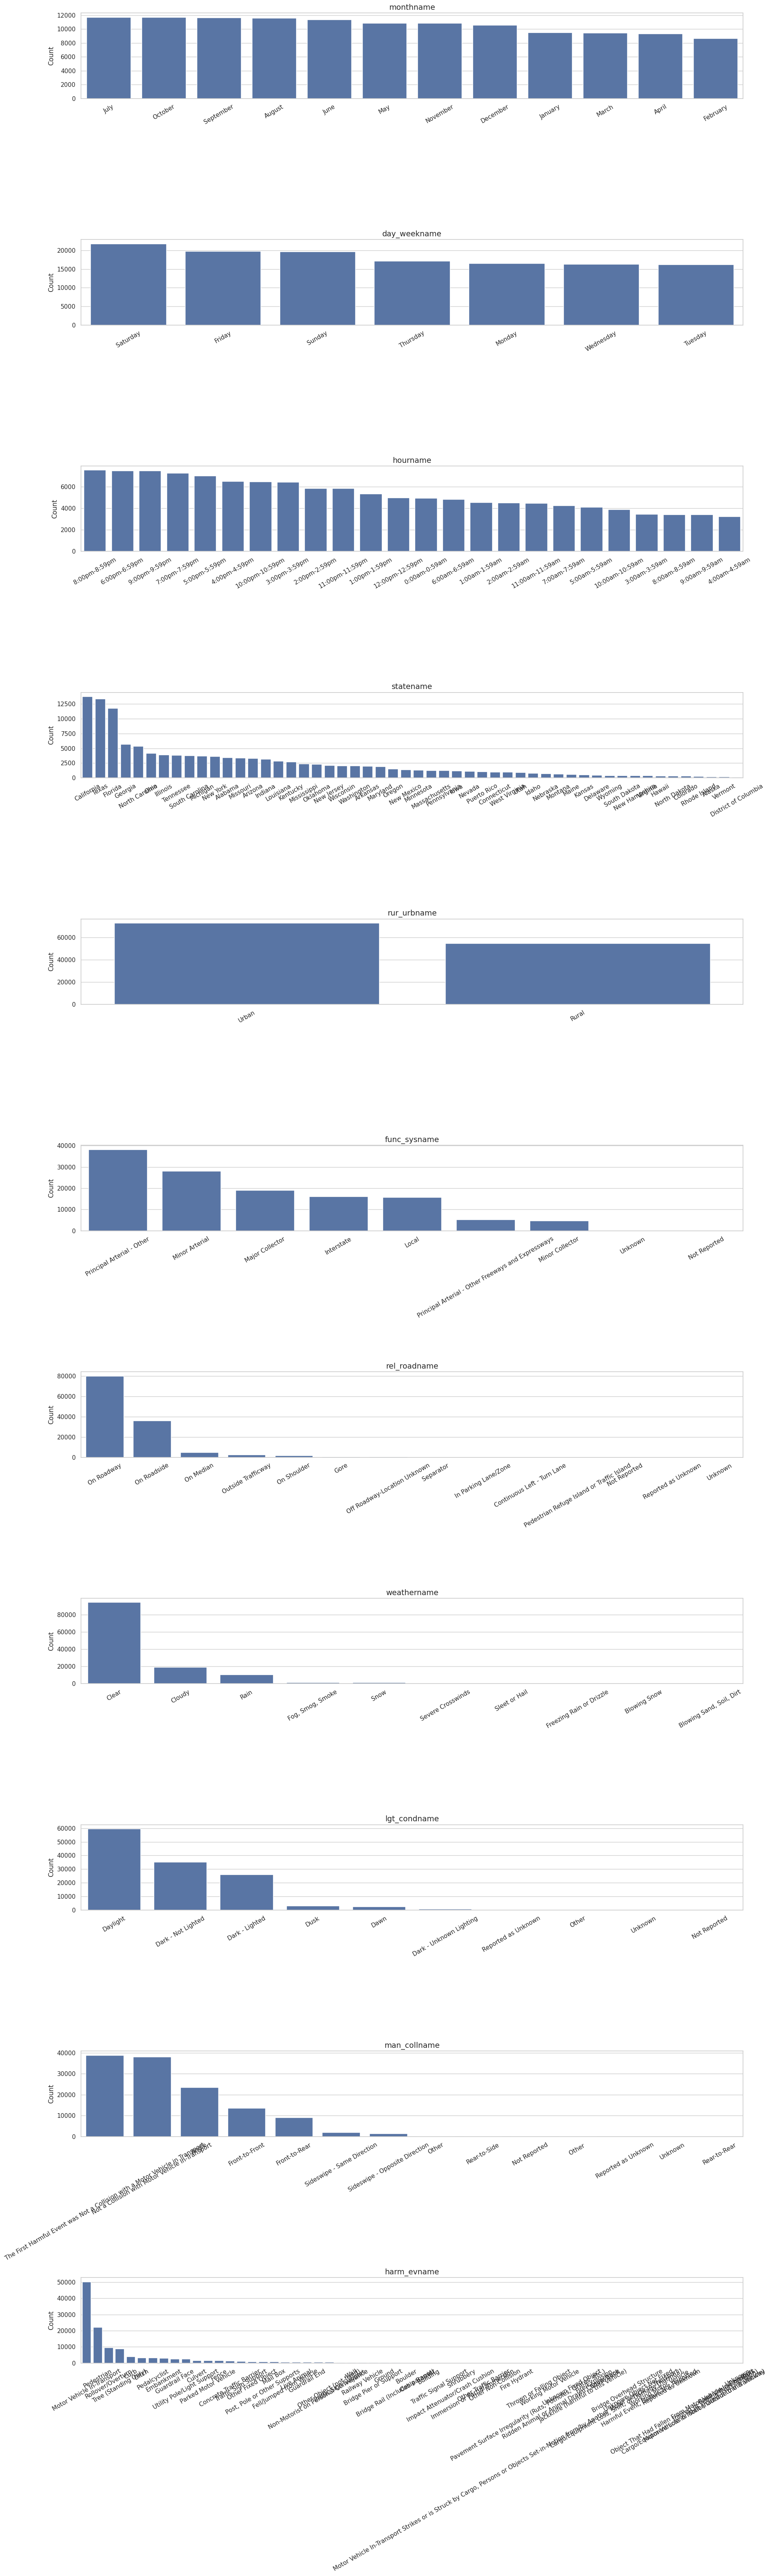

In [104]:
col_cat = ["monthname", "day_weekname", "hourname", "statename", "rur_urbname",
            "func_sysname", "rel_roadname", "weathername", "lgt_condname", 
            "man_collname", "harm_evname"]


dtype: object
n_rows = len(col_cat)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(20, 6 * n_rows))
fig.subplots_adjust(hspace=0.6)

if n_rows == 1:
    axes = [axes]

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel("")  
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


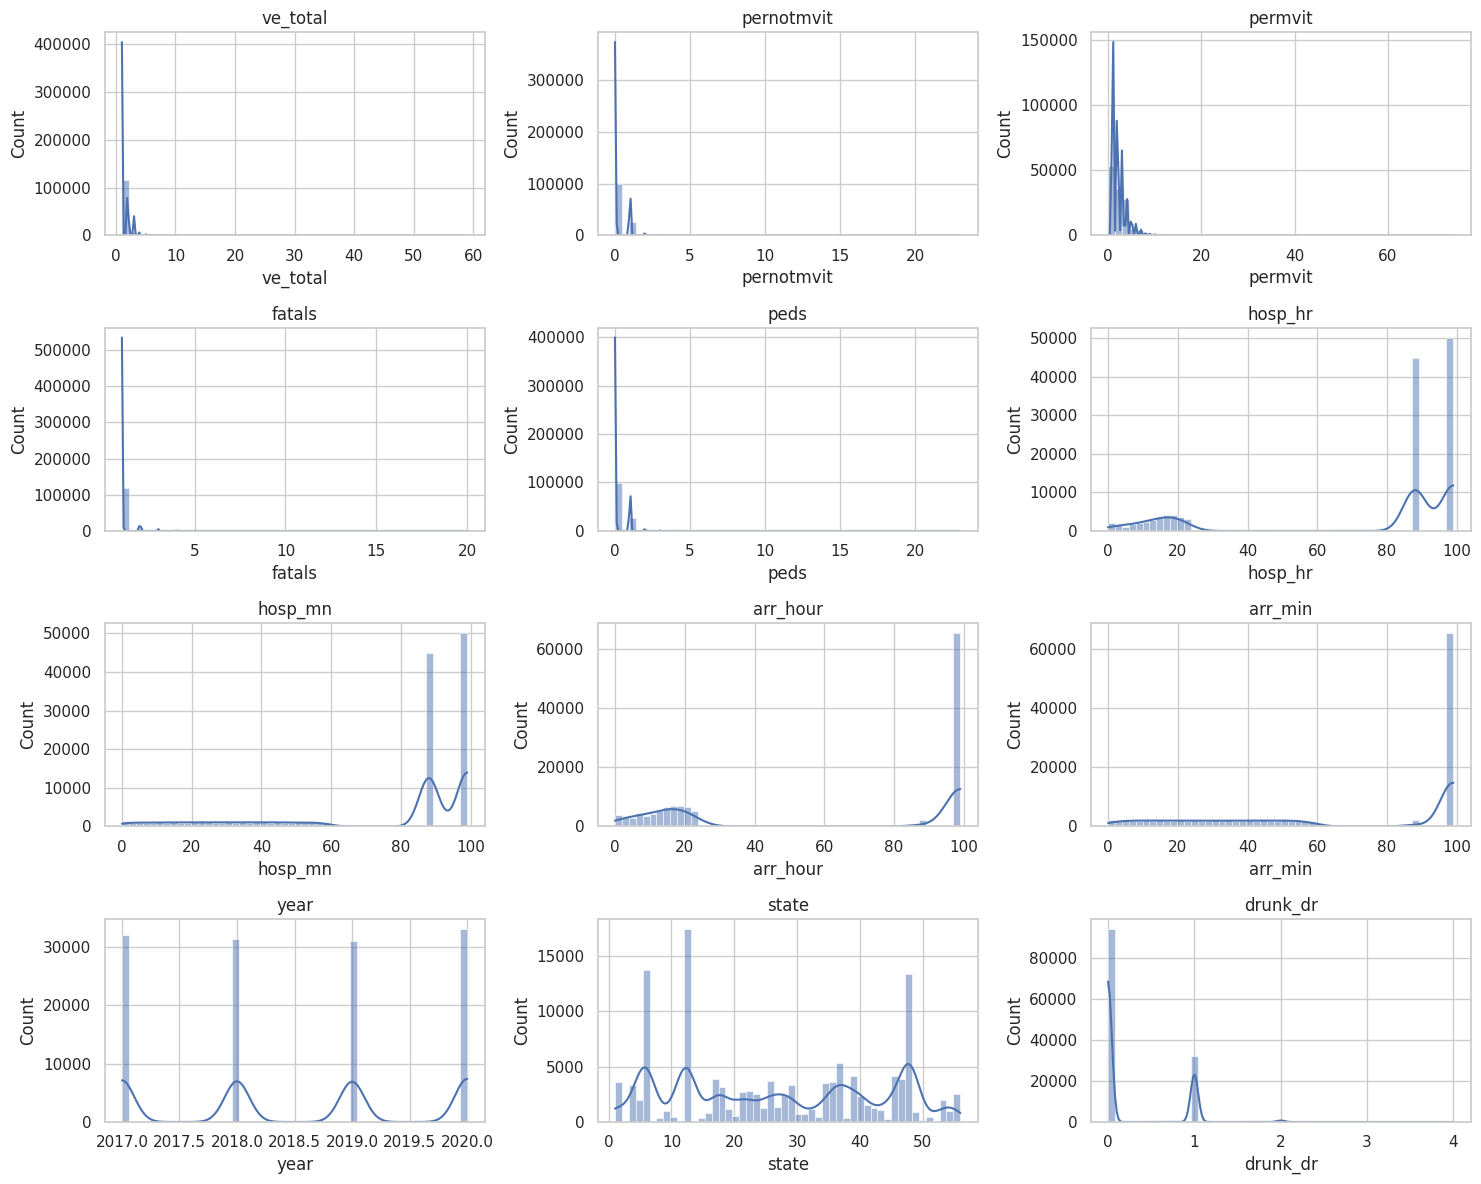

In [105]:
col_num = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = math.ceil(len(col_num) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
axes = axes.flatten()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(col_num):
    nbins = 10 if col == 'age' else 50
    sns.histplot(x=col, data=df, ax=axes[i], bins=nbins, kde=True)
    axes[i].set_title(f"{col}", fontsize=12)

# Si sobran ejes (porque no llenamos el grid), los escondemos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

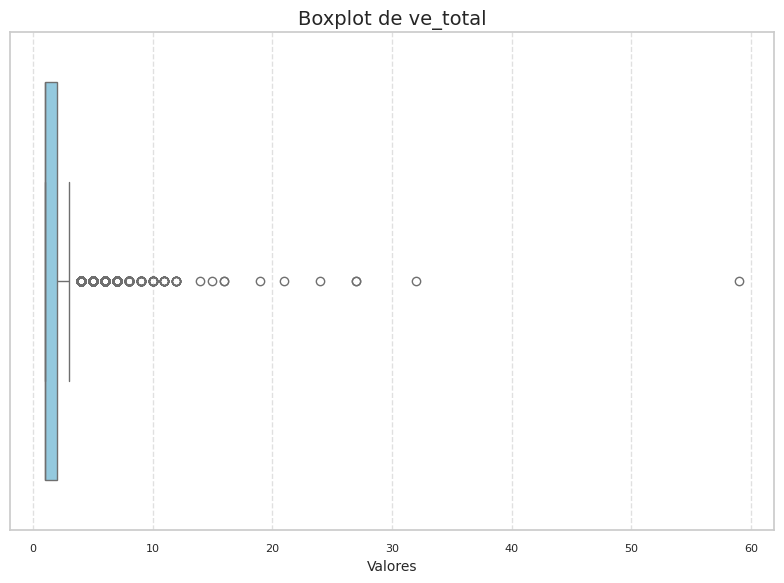

Outliers en ve_total:
        ve_total
22             4
143            4
206            4
228            4
338            4
...          ...
138807         4
138824         4
138869         4
138875         5
138955         6

[3055 rows x 1 columns]
Número de outliers: 3055
------------------------------


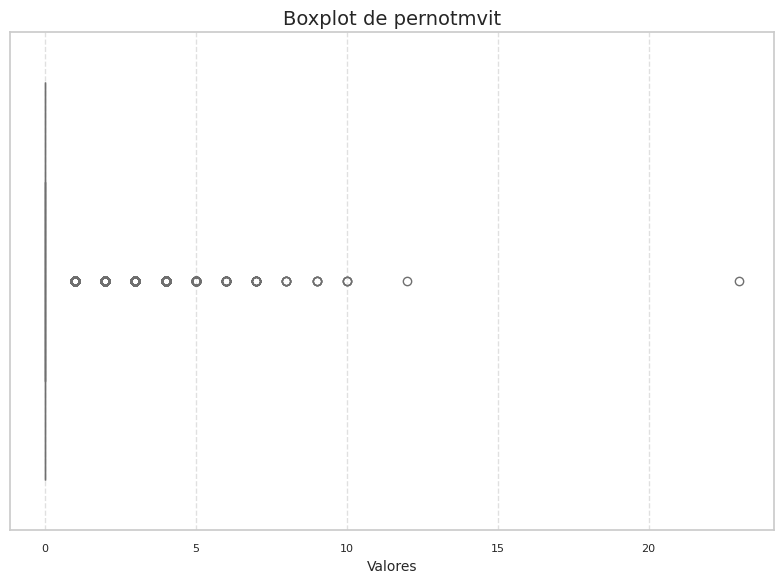

Outliers en pernotmvit:
        pernotmvit
9                1
26               1
39               1
45               1
52               1
...            ...
138938           1
138951           1
138964           1
138970           1
138979           1

[28444 rows x 1 columns]
Número de outliers: 28444
------------------------------


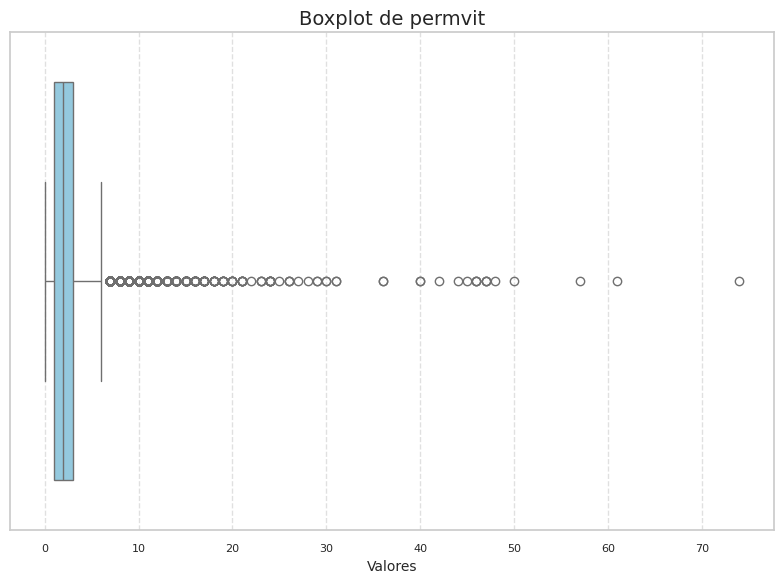

Outliers en permvit:
        permvit
88            7
89            7
178           7
186           7
206           8
...         ...
138888        7
138947       11
138965        8
138977        8
138978        9

[3179 rows x 1 columns]
Número de outliers: 3179
------------------------------


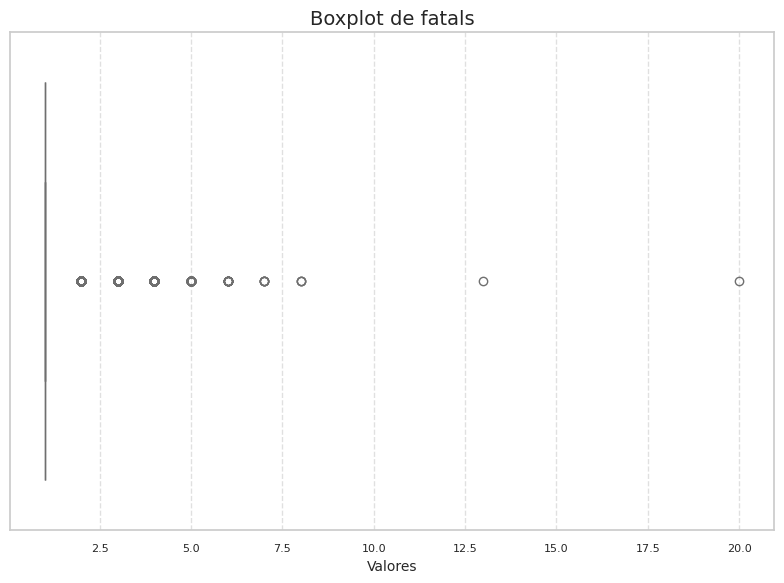

Outliers en fatals:
        fatals
10           2
12           2
34           2
40           2
41           2
...        ...
138924       2
138953       2
138956       2
138965       2
138977       2

[9011 rows x 1 columns]
Número de outliers: 9011
------------------------------


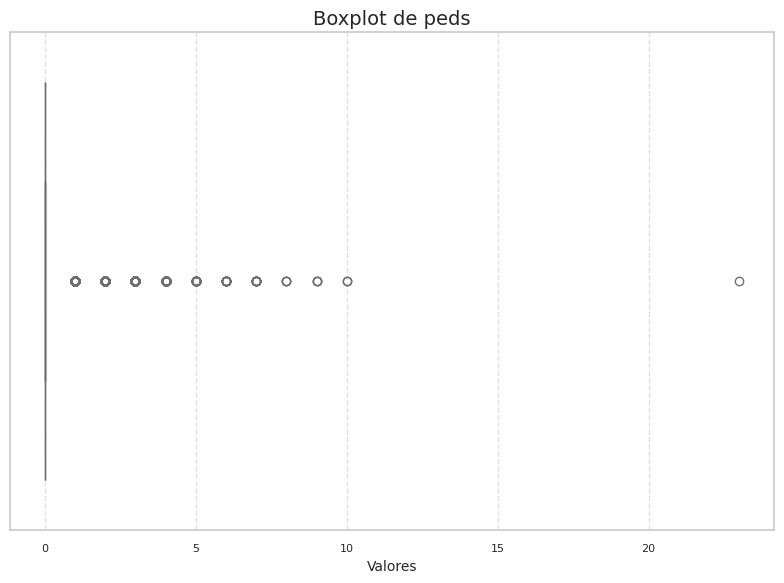

Outliers en peds:
        peds
9          1
26         1
39         1
45         1
52         1
...      ...
138938     1
138951     1
138964     1
138970     1
138979     1

[27755 rows x 1 columns]
Número de outliers: 27755
------------------------------


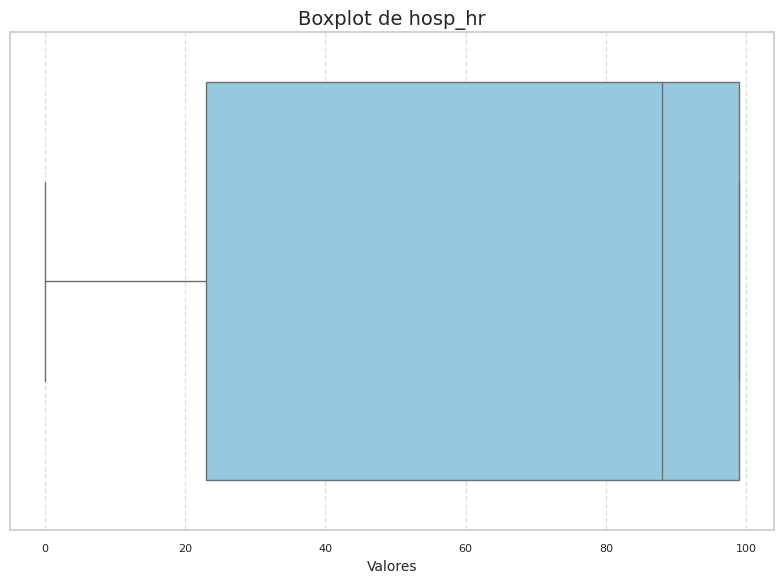

No se encontraron outliers en hosp_hr
------------------------------


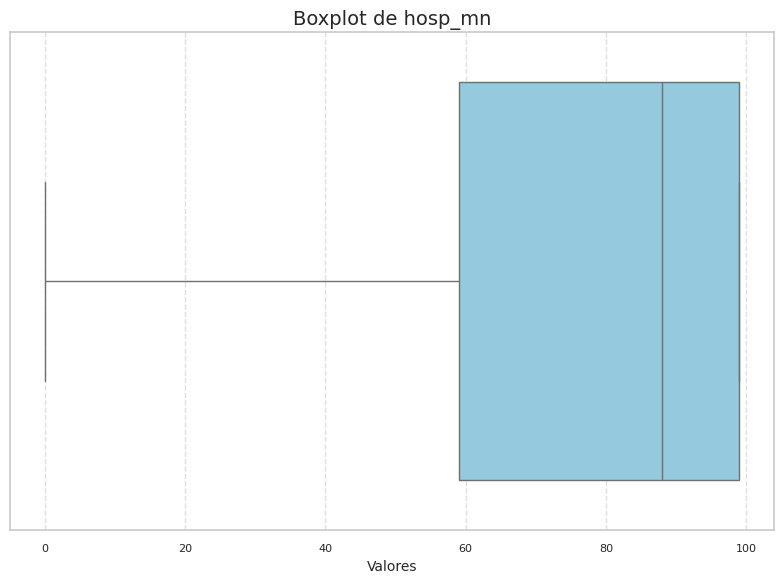

No se encontraron outliers en hosp_mn
------------------------------


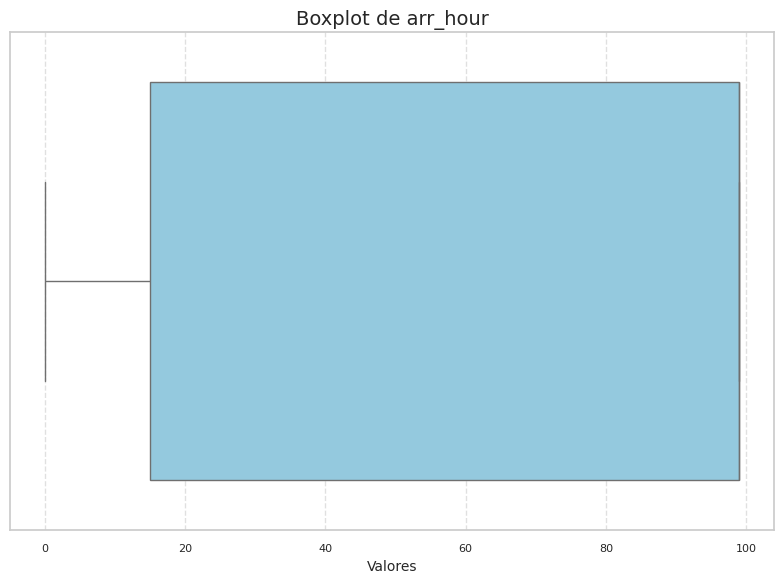

No se encontraron outliers en arr_hour
------------------------------


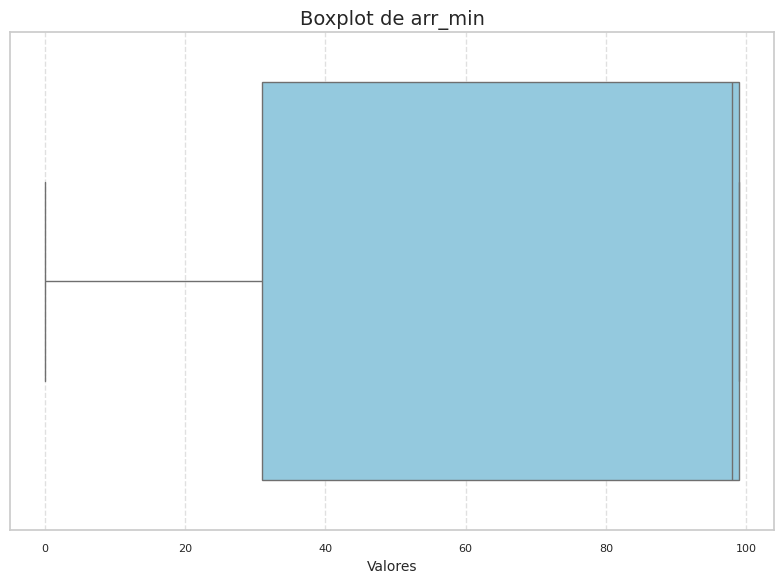

No se encontraron outliers en arr_min
------------------------------


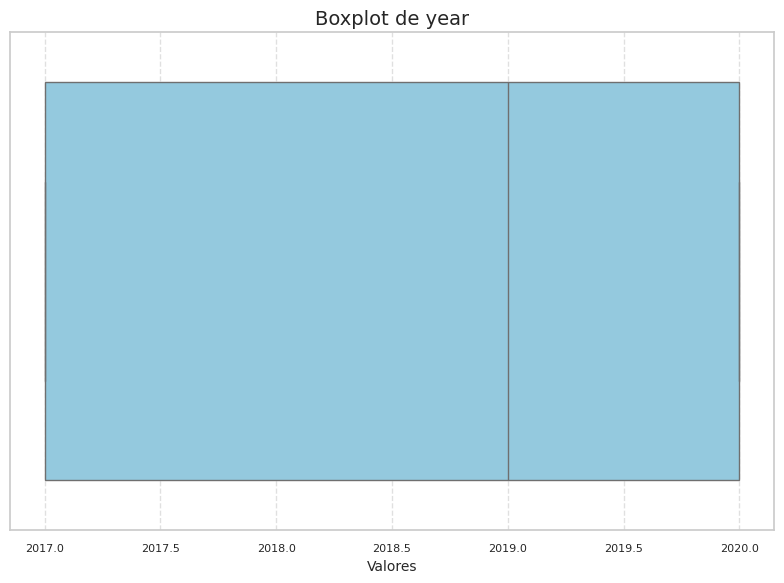

No se encontraron outliers en year
------------------------------


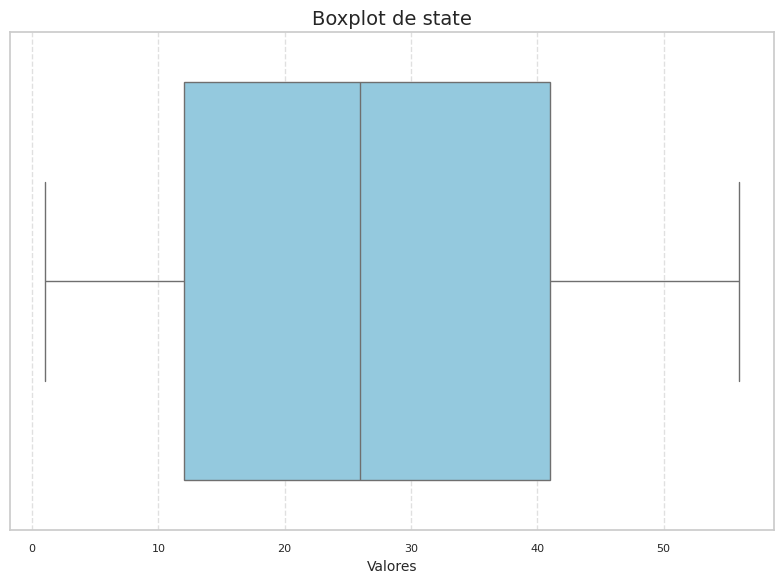

No se encontraron outliers en state
------------------------------


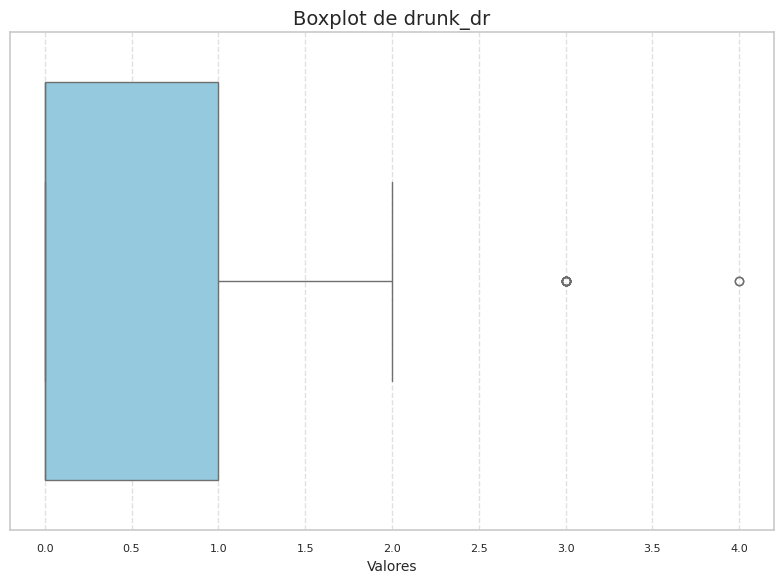

Outliers en drunk_dr:
        drunk_dr
2188         3.0
23821        3.0
24132        3.0
34788        3.0
40095        3.0
43313        4.0
88342        4.0
113869       3.0
119976       3.0
120492       3.0
123257       3.0
123944       3.0
126585       3.0
Número de outliers: 13
------------------------------


In [106]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='skyblue')  
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.xlabel('Valores', fontsize=10)
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.xticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers en {col}:")
        print(outliers[[col]])
        print(f"Número de outliers: {len(outliers)}")
        print("-" * 30)
    else:
        print(f"No se encontraron outliers en {col}")
        print("-" * 30)

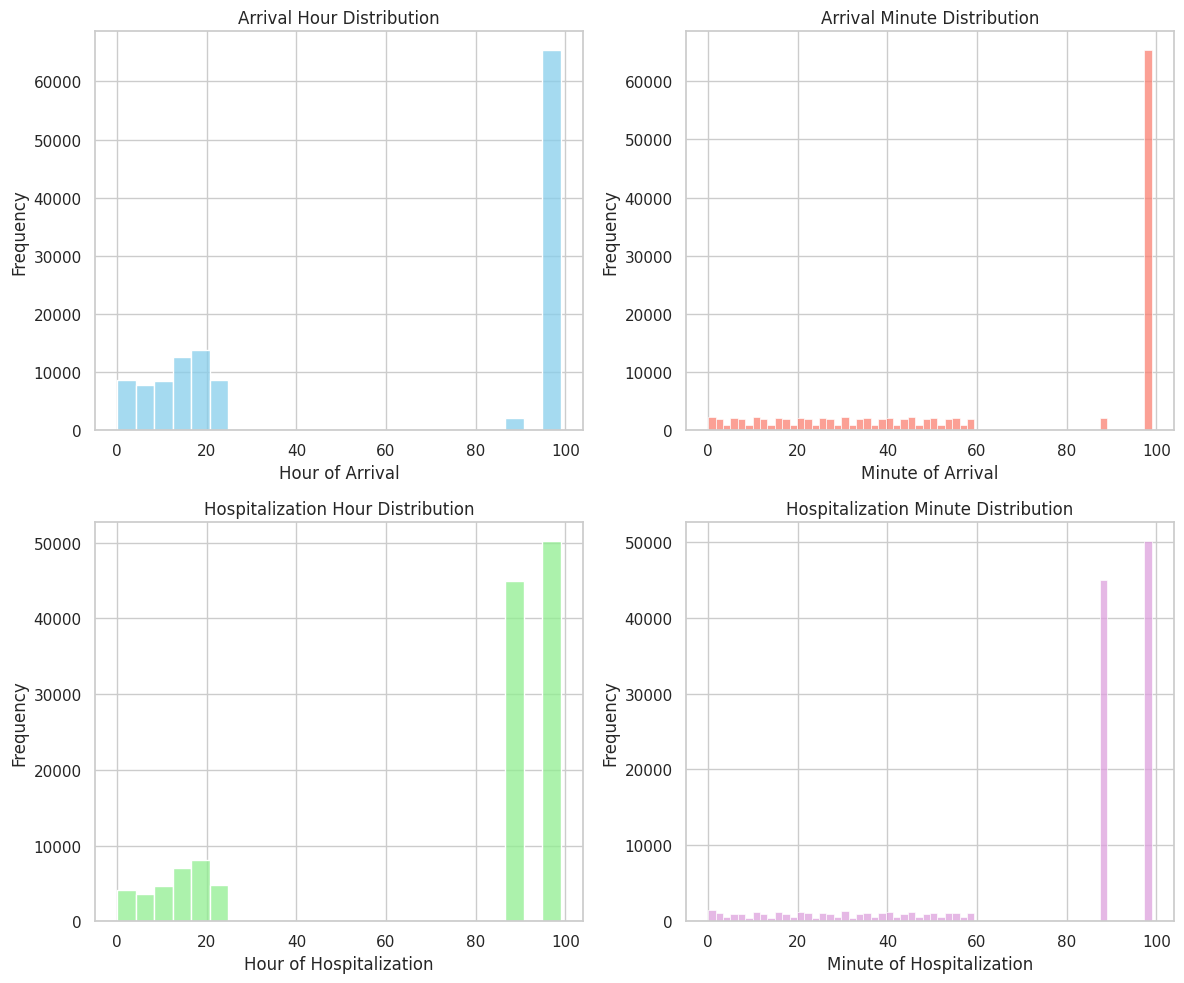

In [107]:
sns.set(style="whitegrid")

# Tamaño general de los gráficos
plt.figure(figsize=(12, 10))

# Histograma 1: arr_hour
plt.subplot(2, 2, 1)
sns.histplot(df['arr_hour'], bins=24, kde=False, color="skyblue")
plt.title('Arrival Hour Distribution')
plt.xlabel('Hour of Arrival')
plt.ylabel('Frequency')

# Histograma 2: arr_min
plt.subplot(2, 2, 2)
sns.histplot(df['arr_min'], bins=60, kde=False, color="salmon")
plt.title('Arrival Minute Distribution')
plt.xlabel('Minute of Arrival')
plt.ylabel('Frequency')

# Histograma 3: hosp_hr
plt.subplot(2, 2, 3)
sns.histplot(df['hosp_hr'], bins=24, kde=False, color="lightgreen")
plt.title('Hospitalization Hour Distribution')
plt.xlabel('Hour of Hospitalization')
plt.ylabel('Frequency')

# Histograma 4: hosp_mn
plt.subplot(2, 2, 4)
sns.histplot(df['hosp_mn'], bins=60, kde=False, color="plum")
plt.title('Hospitalization Minute Distribution')
plt.xlabel('Minute of Hospitalization')
plt.ylabel('Frequency')

# Ajuste final
plt.tight_layout()
plt.show()

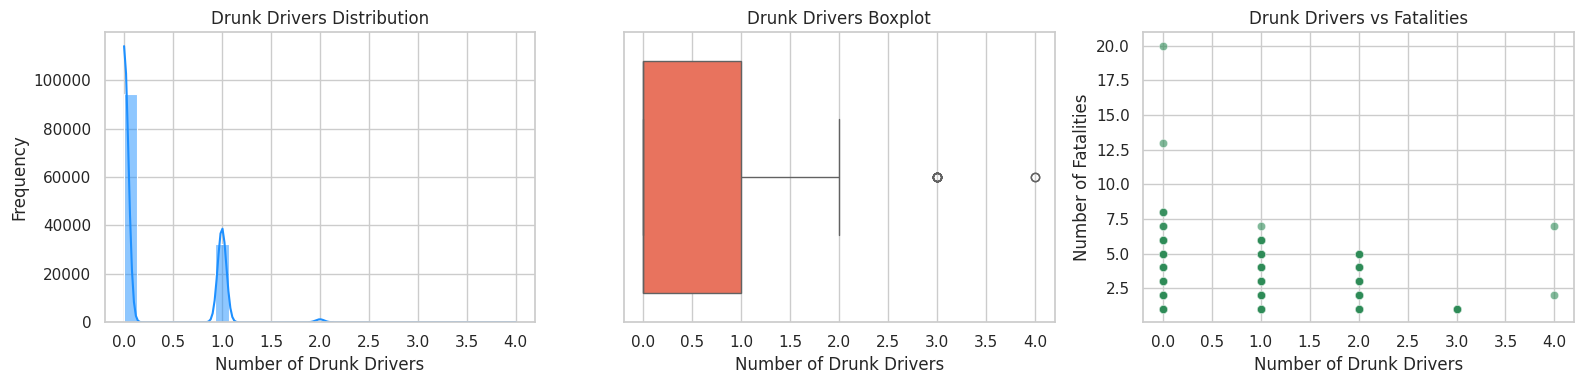

In [108]:
# Histograma de drunk_dr
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['drunk_dr'].dropna(), bins=30, kde=True, color="dodgerblue")
plt.title('Drunk Drivers Distribution')
plt.xlabel('Number of Drunk Drivers')
plt.ylabel('Frequency')

# Boxplot de drunk_dr
plt.subplot(1, 3, 2)
sns.boxplot(x=df['drunk_dr'], color="tomato")
plt.title('Drunk Drivers Boxplot')
plt.xlabel('Number of Drunk Drivers')

# Scatter plot: drunk_dr vs fatals
plt.subplot(1, 3, 3)
sns.scatterplot(x='drunk_dr', y='fatals', data=df, alpha=0.6, color="seagreen")
plt.title('Drunk Drivers vs Fatalities')
plt.xlabel('Number of Drunk Drivers')
plt.ylabel('Number of Fatalities')

plt.tight_layout()
plt.show()


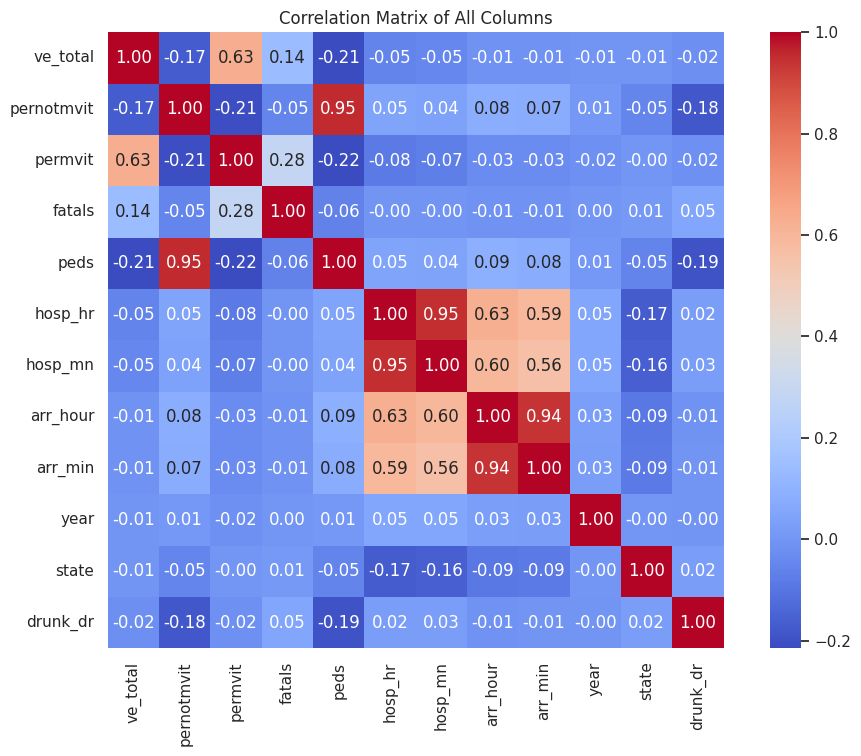

In [109]:
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Mat' \
'rix of All Columns')
plt.show()